In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
import scipy.stats
import sklearn.cluster
import math
# import imread

In [3]:
def add_gaussian_noise(im,prop,varSigma):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    e = varSigma*np.random.randn(np.prod(im.shape)).reshape(im.shape)
    im2 = np.copy(im)
    im2[index] += e[index]
    return im2

def add_saltnpeppar_noise(im,prop):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    im2 = np.copy(im)
    im2[index] = 1-im2[index]
    return im2

In [4]:
# MxN are Image dimensions 
# i and j is co-ordiantes of node being evaluated
# n is nearest neighbours


def neighbours(i,j,M,N,size=8):
    if size==4:
        if (i==0 and j==0):
            n=[(0,1), (1,0)]
        elif i==0 and j==N-1:
            n=[(0,N-2), (1,N-1)]
        elif i==M-1 and j==0:
            n=[(M-1,1), (M-2,0)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2), (M-2,N-1)]
        elif i==0:
            n=[(0,j-1), (0,j+1), (1,j)]
        elif i==M-1:
            n=[(M-1,j-1), (M-1,j+1), (M-2,j)]
        elif j==0:
            n=[(i-1,0), (i+1,0), (i,1)]
        elif j==N-1:
            n=[(i-1,N-1), (i+1,N-1), (i,N-2)]
        else:
            n=[(i-1,j), (i+1,j), (i,j-1), (i,j+1)]
        return n
    if size==8:
        if (i==0 and j==0):
            n=[(0,1),(1,1), (1,0)]
        elif i==0 and j==N-1:
            n=[(0,N-2),(1,N-2), (1,N-1)]
        elif i==M-1 and j==0:
            n=[(M-1,1),(M-2,1), (M-2,0)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2),(M-2,N-2), (M-2,N-1)]
        elif i==0:
            n=[(0,j-1), (0,j+1), (1,j), (1,j-1), (1,j+1)]
        elif i==M-1:
            n=[(M-1,j-1), (M-1,j+1), (M-2,j), (M-2,j-1), (M-2,j+1)]
        elif j==0:
            n=[(i-1,0), (i+1,0), (i,1), (i-1,1), (i+1,1)]
        elif j==N-1:
            n=[(i-1,N-1), (i+1,N-1), (i,N-2), (i-1,N-2), (i+1,N-2)]
        else:
            n=[(i-1,j), (i+1,j), (i,j-1), (i,j+1), (i-1,j-1), (i-1,j+1), (i+1,j+1), (i+1,j-1)]
        return n
    if size==6:
        if (i==0 and j==0):
            n=[(1,1), (1,0)]
        elif i==0 and j==N-1:
            n=[(1,N-2), (1,N-1)]
        elif i==M-1 and j==0:
            n=[(M-2,1), (M-2,0)]
        elif i==M-1 and j==N-1:
            n=[(M-2,N-2), (M-2,N-1)]
        elif i==0:
            n=[(1,j), (1,j-1), (1,j+1)]
        elif i==M-1:
            n=[(M-2,j), (M-2,j-1), (M-2,j+1)]
        elif j==0:
            n=[(i-1,0), (i+1,0), (i-1,1), (i+1,1)]
        elif j==N-1:
            n=[(i-1,N-1), (i+1,N-1), (i-1,N-2), (i+1,N-2)]
        else:
            n=[(i-1,j), (i+1,j), (i-1,j-1), (i-1,j+1), (i+1,j+1), (i+1,j-1)]
        return n
    return -1

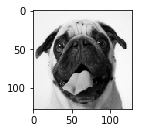

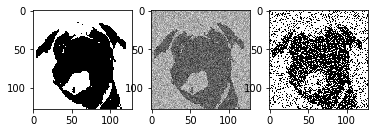

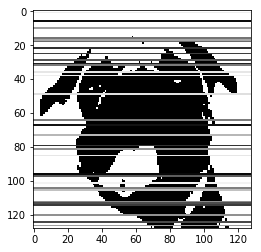

In [5]:
# proportion of pixels to alter

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def convertToBinary(im, threshold=0.5):
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if(im[i][j] >threshold):
                im[i][j] = 1
            else:
                im[i][j] = 0
    return im

def add_lines(prop, imX):
    im = imX.copy()
    for i in range(0, im.shape[0]):
        random = np.random.randint(1000)/1000
        if(random>prop):
            color = np.random.randint(256)/256
            for j in range(im.shape[1]):
                im[i][j] = color
    return im

prop = 1
prop2 = 0.2
varSigma = 0.3
im = rgb2gray(imread('pug128x128.png'))
# im = rgb2gray(imread.imread('pug128x128.png'))



im = im/255
fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im,cmap='gray')

im = convertToBinary(im)
fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im,cmap='gray')

im2 = add_gaussian_noise(im,prop,varSigma)
im2 = (im2 - im2.min())/(im2.max() - im2.min()) #normalising image
ax2 = fig.add_subplot(132)
ax2.imshow(im2,cmap='gray')


im3 = add_saltnpeppar_noise(im,prop2)
im3 = (im3 - im3.min())/(im3.max() - im3.min())
ax3 = fig.add_subplot(133)
ax3.imshow(im3,cmap='gray')

plt.show()

im4 = add_lines(0.7, im)

        
plt.imshow(im4, cmap="gray")
plt.show()

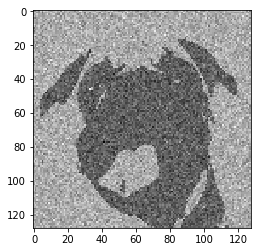

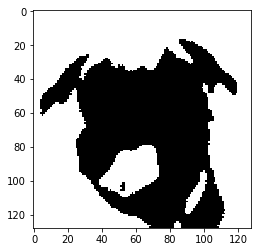

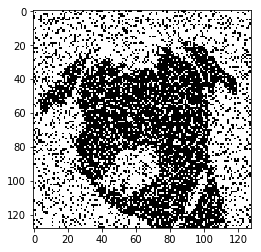

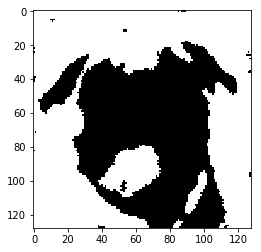

In [6]:
# Question 1 ICM
# Extra: extend noise (q1 extra)
# Iteratuve Conditional Modes
M, N = im2.shape

def prob(imX,originalIM,  i, j, beta, eta):
    n = neighbours(i,j, M,N, size=8)
    sumPlus = 0 
    sumMinus = 0
#     for k in range(np.shape(n)[0]):
#         sumPlus += imX[n[k]] * 1
#         sumMinus += imX[n[k]] * -1
    for k in range(np.shape(n)[0]):
        if imX[n[k]] >0.5:
            sumPlus += 1
        else:
            sumPlus -= 1 
    sumMinus = -sumPlus
    val1 = np.exp(-(- beta * sumPlus + eta*-((1*(2*originalIM[i][j] -1))+1)/2))
    val2 = np.exp(-(- beta * sumMinus + eta* -((-1*(2*originalIM[i][j] -1))+1)/2))
    return val1>val2

def denoise_ICM(imX, beta, eta, iterations):
    originalIM = imX.copy()
    x = imX.copy()
    for count in range(iterations):
        countChange = 0
        for i in  range(imX.shape[0]):
            for j in range(imX.shape[1]):
                if(prob(imX,originalIM, i,j,beta,eta)):
                    if(imX[i][j] != 1):
                        countChange += 1
                    x[i][j] = 1                  
                else:
                    if(imX[i][j] != -1):
                        countChange += 1
                    x[i][j] = -1
        if (countChange == 0): 
            print("Found minimum early: " + str(count))
            return x
        originalIM = imX.copy()
        imX = x.copy()
    return x



# imICM = denoise_ICM(im2, 0.5, 0.4, 0.7, 30)
im2ICM = denoise_ICM(im2, 0.5, 1, 10) # Imporoved performance
im3ICM = denoise_ICM(im3, 0.5, 1, 10)
# imICM = (imICM + 1)/2
fig = plt.figure()

plt.imshow(im2, cmap="gray")
plt.show()

plt.imshow(im2ICM, cmap="gray")
plt.show()

plt.imshow(im3, cmap="gray")
plt.show()

plt.imshow(im3ICM, cmap="gray")
plt.show()


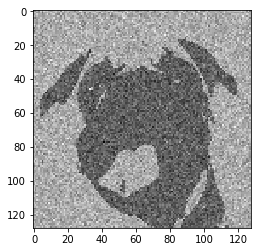

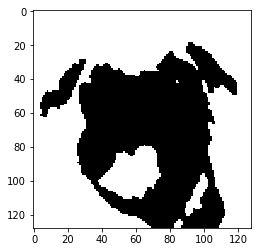

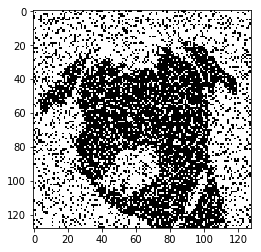

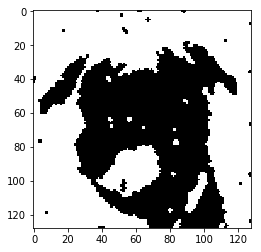

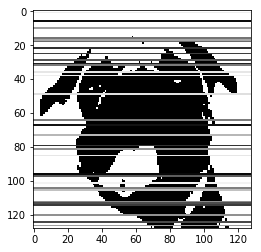

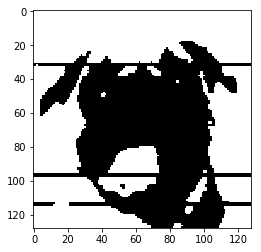

In [29]:
# Question 2 Gibbs Sampling
M, N = im2.shape

def prob_Gibbs(imXx, originalIM,  i, j, beta, eta):
    n = neighbours(i,j, M,N, size=8)
    sumPlus = 0 
    sumMinus = 0
    for k in range(np.shape(n)[0]):
        sumPlus += imXx[n[k]]*1
        sumMinus += imXx[n[k]]*-1
    prior_pos = np.exp((beta*sumPlus))
    prior_neg = np.exp((beta*sumMinus))
    likelihood_pos = np.exp(eta*((1*originalIM[i][j])+1)/2)
    likelihood_neg = np.exp(eta*((-1*originalIM[i][j])+1)/2)
#     likelihood_pos = scipy.stats.norm.pdf(originalIM[i][j],1,eta);
#     likelihood_neg = scipy.stats.norm.pdf(originalIM[i][j],-1,eta)
    outcome = (prior_pos*likelihood_pos)/(prior_pos*likelihood_pos + prior_neg*likelihood_neg)
#     outcome_neg = (val2)/(val1 + val2)
#     outcome = outcome_pos/(outcome_pos+outcome_neg)
    p = np.random.uniform(0,1);
    return outcome>p

def denoise_Gibbs(imX, beta, eta, iterations, random=False):
    originalIM = 2*imX.copy()-1
    x = 2*imX.copy()-1
    for count in range(iterations):
        if(random):
            for n in range(10000):
                i = np.random.randint(x.shape[0])
                j = np.random.randint(x.shape[1])
                if(prob_Gibbs(x,originalIM, i,j, beta, eta)):
                    x[i][j] = 1
                else:
                    x[i][j] = -1
        else:
            for i in  range(x.shape[0]):
                for j in range(x.shape[1]):
                    if(prob_Gibbs(x,originalIM,i,j, beta, eta)):
                        x[i][j] = 1
                    else:
                        x[i][j] = -1   
        originalIM = x.copy()
    return x


fig = plt.figure()
# imNormalised = 2*(im2.copy())-1
im2Gibbs = denoise_Gibbs(im2, 1, 10, 10, random=False)
im3Gibbs = denoise_Gibbs(im3, 1.2, 10, 10, random=False)
im4Gibbs = denoise_Gibbs(im4, 1.2, 10, 10, random=False)


plt.imshow(im2,cmap='gray')
plt.show()

plt.imshow(im2Gibbs,cmap='gray')
plt.show()

plt.imshow(im3,cmap="gray")
plt.show()

plt.imshow(im3Gibbs, cmap="gray")
plt.show()

plt.imshow(im4,cmap="gray")
plt.show()

plt.imshow(im4Gibbs, cmap="gray")
plt.show()

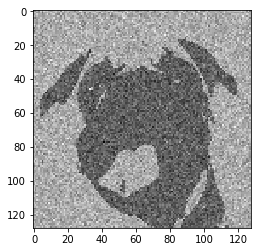

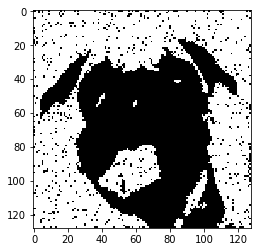

0.075927734375


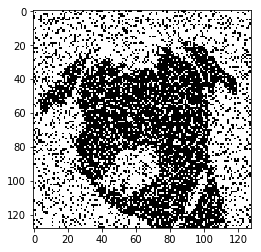

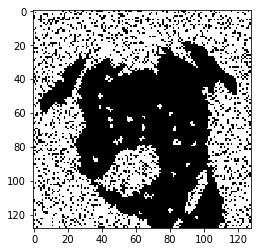

0.194458007813


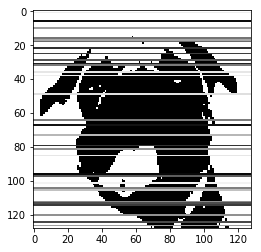

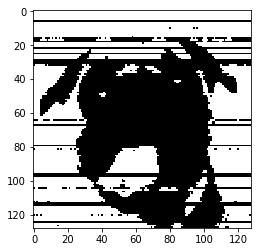

0.179931640625


In [28]:
# Question 6 variational Bayes
M, N = im2.shape

def prob_vb(muCurrent, imX, originalIM, i, j, beta, eta):
    n = neighbours(i,j, M,N, size=8)
    m0 = 0 
    for k in range(np.shape(n)[0]):
        m0+= (muCurrent[n[k]])
    m0 = m0*beta
    posL = eta*((1*(2*originalIM[i][j] -1))+1)/2
    negL = eta*((-1*(2*originalIM[i][j] -1))+1)/2
    
    mu = np.tanh(m0 + 1/2*(posL - negL))
    return mu

def denoise_vb(imX, beta, eta, iterations):
    muCurrent = np.random.random_sample((M,N))
    muNext = muCurrent.copy()
    x = 2*imX.copy() -1
    originalIM = 2*imX.copy() -1
    for count in range(iterations):
        for i in  range(x.shape[0]):
            for j in range(x.shape[1]):
                muNext[i][j] = prob_vb(muCurrent, x, originalIM, i, j, beta, eta)
                if(muNext[i][j]>0):
                    x[i][j] = 1
                else:
                    x[i][j] = -1 
        originalIM = x.copy()
        muCurrent = muNext.copy()
    return x


# imNormalised = 2*(im2.copy())-1
im2VB = denoise_vb(im2, 1.2, 10, 20)
im3VB = denoise_vb(im3,  1.2, 10, 10)
im4VB = denoise_vb(im4, 1.2, 10, 10)


plt.imshow(im2,cmap='gray')
plt.show()
# plt.savefig("im2.png", bbox_inches="tight")

plt.imshow(im2VB,cmap='gray')
plt.show()
# plt.savefig("im2VB.png", bbox_inches="tight")

print(np.sum((im*2-1)-im2VB)/(128*128))

plt.imshow(im3,cmap="gray")
plt.show()
# plt.savefig("im3.png", bbox_inches="tight")

plt.imshow(im3VB, cmap="gray")
plt.show()
# plt.savefig("im3VB.png", bbox_inches="tight")

print(np.sum((im*2-1)-im3VB)/(128*128))

plt.imshow(im4,cmap="gray")
plt.show()

plt.imshow(im4VB, cmap="gray")
plt.show()

print(np.sum((im*2-1)-im4VB)/(128*128))

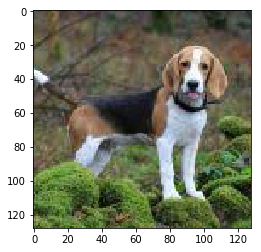

1800
[ 0.03666667  0.00333333  0.          0.          0.005       0.07166667
  0.          0.005       0.015       0.035       0.12166667  0.02833333
  0.01        0.          0.          0.06        0.          0.06        0.
  0.01333333  0.01166667  0.          0.          0.          0.00666667
  0.08333333  0.005       0.04833333  0.005       0.005       0.18166667
  0.03166667  0.00166667  0.          0.13        0.00666667  0.
  0.01333333  0.005       0.        ]
[ 0.          0.07528958  0.05405405  0.03764479  0.          0.
  0.03667954  0.02895753  0.00965251  0.          0.00096525  0.02702703
  0.02220077  0.02702703  0.04247104  0.          0.05405405  0.00482625
  0.06274131  0.04150579  0.01351351  0.01544402  0.03764479  0.04633205
  0.02413127  0.          0.          0.003861    0.05598456  0.02702703
  0.          0.003861    0.0472973   0.0492278   0.          0.02413127
  0.04440154  0.01351351  0.00868726  0.05984556]


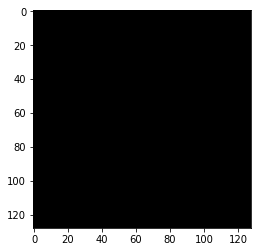

In [164]:
#Question 8 Image segmentation
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

M, N = im2.shape

def getmasks(mask):
    foregroundMask = np.zeros((mask.shape[0],mask.shape[1])) -1
    backgroundMask = np.zeros((mask.shape[0],mask.shape[1])) -1
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if(mask[i][j][0] == 0 and mask[i][j][1] == 255 and mask[i][j][2] == 0):
                foregroundMask[i][j] = 1
            if(mask[i][j][0] == 255 and mask[i][j][1] == 0 and mask[i][j][2] == 0):
                backgroundMask[i][j] = 1
    return (foregroundMask, backgroundMask)

def create_randomMasks(imX):
    foregroundMask = np.zeros((imX.shape[0],imX.shape[1]))
    for i in range (imX.shape[0]):
        for j in range (imX.shape[1]):
            random = np.random.randint(2)
            if(random == 1):
                foregroundMask[i][j] = 1
            else:
                foregroundMask[i][j] = -1
    return foregroundMask

def mask_2darray(imX, mask):
    result = []
    for i in range (imX.shape[0]):
        for j in range (imX.shape[1]):
            if(mask[i][j] == 1):
                result.append(imX[i][j])
    return np.array(result)

def calc_histogram(maskedIm, bins):
    histogram = np.zeros(len(bins))
    for i in range (len(maskedIm)):
        minDist = 10000
        binLoc = 0
        for j in range (len(bins)):
            distance = math.sqrt((bins[j][0] - maskedIm[i][0])**2+(bins[j][1] - maskedIm[i][1])**2+(bins[j][2] - maskedIm[i][2])**2)
            if(distance<minDist):
                binLoc = j
                minDist = distance
        histogram[binLoc] +=1
    return histogram

def getmaskedhistograms(imColor, imMask, bins):
    foregroundMask, backgroundMask = getmasks(imMask)
#     plt.imshow(backgroundMask, cmap="gray")
#     plt.show()
    foregroundMaskedIm = mask_2darray(imColor, foregroundMask)
    backgroundMaskedIm = mask_2darray(imColor, backgroundMask)
    histogramPos = calc_histogram(foregroundMaskedIm, bins)
    histogramNeg = calc_histogram(backgroundMaskedIm, bins)
    histogramPos = histogramPos/(np.sum(histogramPos))
    histogramNeg = histogramNeg/(np.sum(histogramNeg))
    return histogramPos, histogramNeg

def prob_histogram(imX, mask, histogramPos, histogramNeg, bins, i, j, beta, eta):
    n = neighbours(i,j, M,N, size=8) 
    pos_sum = 0
    neg_sum = 0
    for k in range(np.shape(n)[0]):
        pos_sum += (mask[n[k]])*1
        neg_sum += (mask[n[k]])*-1
    minDist = 10000
    binLoc = 0
    for j in range (len(bins)):
        distance = math.sqrt((bins[j][0] - imX[i][j][0])**2+(bins[j][1] -imX[i][j][1])**2+(bins[j][2] - imX[i][j][2])**2)
        if(distance<minDist):
            binLoc = j
            minDist = distance
    
    prior_pos = np.exp((beta*pos_sum))
    prior_neg = np.exp((beta*neg_sum))
#     Prior = prior_pos/(prior_pos+prior_neg)
    
    likelihood_pos = eta*histogramPos[binLoc]
    likelihood_neg = eta*histogramNeg[binLoc]
#     Likelihood = likelihood_pos/(likelihood_pos+likelihood_neg)
#     print(likelihood_pos, ":", likelihood_neg)
    outcome = (prior_pos*likelihood_pos)/(prior_pos*likelihood_pos + prior_neg*likelihood_neg)
#     Posterior = (Prior * Likelihood) / ((Prior * Likelihood) + ((1 - Prior) * (1 - Likelihood)))
    p = np.random.uniform(0,1);
    return outcome>p



def segment_im(imX, beta, eta, iterations):
    imMask = imread('image128x128mask.png')
    x, y, z = imColor.shape
    image_2d = imColor.reshape(x*y, z)
    results = sklearn.cluster.KMeans(n_clusters=40).fit(image_2d)
    bins = results.cluster_centers_
    foregroundHistogram, backgroundHistogram = getmaskedhistograms(imX, imMask, bins)
    mask1 = create_randomMasks(imX)
    print(foregroundHistogram)
    print(backgroundHistogram)
    
    for count in range(iterations):
        for i in  range(imX.shape[0]):
            for j in range(imX.shape[1]):
                if(prob_histogram(imX,mask1, foregroundHistogram, backgroundHistogram, bins, i, j, beta, eta)):
                    mask1[i][j] = 1
                else:
                    mask1[i][j] = -1
    return mask1

imColor = imread('images.jpg')
plt.imshow(imColor)
plt.show()
mask = segment_im(imColor, 1.3, 7, 10)
index = (mask==1)
imColor[index] = [0, 0, 0]
plt.imshow(mask, cmap="gray")
plt.show()